In [1]:
# Import appropriate libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

In [2]:
# Read in the data

data = arff.loadarff('../Springboard/CAPSTONE/Data/ThoracicSurgery.arff')
df = pd.DataFrame(data[0])

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


In [3]:
df.columns

Index(['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
       'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr'],
      dtype='object')

In [4]:
df.shape

(470, 17)

In [5]:
# Function to decode the data (remove the byte info 'b')

def apply_decode(df_name):
    for col_name in df_name.columns:
        if df_name[col_name].dtype != 'float64':
            df_name[col_name] = df_name[col_name].apply(lambda col: col.decode('utf-8'))
    return df_name

In [6]:
# Apply decoding to data 

apply_decode(df)

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60.0,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51.0,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59.0,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54.0,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63.0,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61.0,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52.0,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79.0,F


In [7]:
# Replace the Boolean values with T=1 , F=0

df.replace('F', 0, inplace=True)
df.replace('T', 1, inplace=True)
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73.0,1


In [8]:
# Importing OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

# Encode the ordinal variable columns (PRE6 & PRE14)
# Create ordered categories for the respective var col

PRE6_Categories = ['PRZ0','PRZ1','PRZ2']
PRE14_Categories = ['OC11','OC12','OC13','OC14']

# Instantiate the OrdinalEncoder() w/ the above categories plugged into
# the category parameter

encoder = OrdinalEncoder(categories=[PRE6_Categories, PRE14_Categories])

# Fit the encoder to the data

encoder.fit(df[['PRE6', 'PRE14']])

# and now transform

df[['PRE6', 'PRE14']] = encoder.transform(df[['PRE6', 'PRE14']])

In [9]:
# Verify the ordinal rankings were mapped correctly to the data

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,1.0,0,0,0,1,1,3.0,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,0.0,0,0,0,0,0,1.0,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,1.0,0,0,0,1,0,0.0,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,0.0,0,0,0,0,0,0.0,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,2.0,0,1,0,1,1,0.0,0,0,0,1,0,73.0,1


In [10]:
# Creating dummy variables for the Diagnosis col (DGN)

dummy = pd.get_dummies(df['DGN'], prefix='Dx_')
dummy.head()

,Dx__DGN1,Dx__DGN2,Dx__DGN3,Dx__DGN4,Dx__DGN5,Dx__DGN6,Dx__DGN8
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [11]:
# Merge the dummy cols with the data

df = pd.concat([dummy, df], axis=1)
df.head()

,Dx__DGN1,Dx__DGN2,Dx__DGN3,Dx__DGN4,Dx__DGN5,Dx__DGN6,Dx__DGN8,DGN,PRE4,PRE5,...,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,0,1,0,0,0,0,0,DGN2,2.88,2.16,...,1,1,3.0,0,0,0,1,0,60.0,0
1,0,0,1,0,0,0,0,DGN3,3.40,1.88,...,0,0,1.0,0,0,0,1,0,51.0,0
2,0,0,1,0,0,0,0,DGN3,2.76,2.08,...,1,0,0.0,0,0,0,1,0,59.0,0
3,0,0,1,0,0,0,0,DGN3,3.68,3.04,...,0,0,0.0,0,0,0,0,0,54.0,0
4,0,0,1,0,0,0,0,DGN3,2.44,0.96,...,1,1,0.0,0,0,0,1,0,73.0,1


In [12]:
# Dropping the DGN col since it has been encoded

df.drop('DGN', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dx__DGN1  470 non-null    uint8  
 1   Dx__DGN2  470 non-null    uint8  
 2   Dx__DGN3  470 non-null    uint8  
 3   Dx__DGN4  470 non-null    uint8  
 4   Dx__DGN5  470 non-null    uint8  
 5   Dx__DGN6  470 non-null    uint8  
 6   Dx__DGN8  470 non-null    uint8  
 7   PRE4      470 non-null    float64
 8   PRE5      470 non-null    float64
 9   PRE6      470 non-null    float64
 10  PRE7      470 non-null    int64  
 11  PRE8      470 non-null    int64  
 12  PRE9      470 non-null    int64  
 13  PRE10     470 non-null    int64  
 14  PRE11     470 non-null    int64  
 15  PRE14     470 non-null    float64
 16  PRE17     470 non-null    int64  
 17  PRE19     470 non-null    int64  
 18  PRE25     470 non-null    int64  
 19  PRE30     470 non-null    int64  
 20  PRE32     470 non-null    int64 

In [14]:
# Check for null values

df[df.isnull()].count()

Dx__DGN1    0
Dx__DGN2    0
Dx__DGN3    0
Dx__DGN4    0
Dx__DGN5    0
Dx__DGN6    0
Dx__DGN8    0
PRE4        0
PRE5        0
PRE6        0
PRE7        0
PRE8        0
PRE9        0
PRE10       0
PRE11       0
PRE14       0
PRE17       0
PRE19       0
PRE25       0
PRE30       0
PRE32       0
AGE         0
Risk1Yr     0
dtype: int64

In [15]:
# Checking for NA values

df[df.isna()].count()

Dx__DGN1    0
Dx__DGN2    0
Dx__DGN3    0
Dx__DGN4    0
Dx__DGN5    0
Dx__DGN6    0
Dx__DGN8    0
PRE4        0
PRE5        0
PRE6        0
PRE7        0
PRE8        0
PRE9        0
PRE10       0
PRE11       0
PRE14       0
PRE17       0
PRE19       0
PRE25       0
PRE30       0
PRE32       0
AGE         0
Risk1Yr     0
dtype: int64

This dataset appears to be complete with no null / NA values!

In [16]:
df.nunique(axis=0)

Dx__DGN1      2
Dx__DGN2      2
Dx__DGN3      2
Dx__DGN4      2
Dx__DGN5      2
Dx__DGN6      2
Dx__DGN8      2
PRE4        134
PRE5        136
PRE6          3
PRE7          2
PRE8          2
PRE9          2
PRE10         2
PRE11         2
PRE14         4
PRE17         2
PRE19         2
PRE25         2
PRE30         2
PRE32         2
AGE          45
Risk1Yr       2
dtype: int64

In [17]:
df.describe()

,Dx__DGN1,Dx__DGN2,Dx__DGN3,Dx__DGN4,Dx__DGN5,Dx__DGN6,Dx__DGN8,PRE4,PRE5,PRE6,...,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
count,470.000000,470.000000,470.000000,470.00000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,0.002128,0.110638,0.742553,0.10000,0.031915,0.008511,0.004255,3.281638,4.568702,0.780851,...,0.687234,0.165957,0.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,0.046127,0.314018,0.437693,0.30032,0.175961,0.091958,0.065163,0.871395,11.767857,0.535375,...,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.440000,0.960000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.600000,1.960000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,3.160000,2.400000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,3.807500,3.080000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,6.300000,86.300000,2.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [18]:
# Looking at the breakdown of the response variable

df["Risk1Yr"].value_counts()/df.shape[0]

0    0.851064
1    0.148936
Name: Risk1Yr, dtype: float64

This brief look at the variable we want to predict shows that, unsurprisingly, the 1 Yr Risk column contains 2 classes (Alive = 0 , Deceased = 1) and they are unbalanced at a ratio of around 85/15 Alive/Deceased. This will need to be considered later on when forming the training data.

In [19]:
df.groupby(df['Risk1Yr'])['PRE4'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk1Yr,,,,,,,,
0,400.0,3.298525,0.889646,1.44,2.60,3.16,3.84,6.30
1,70.0,3.185143,0.757218,2.00,2.64,3.04,3.66,4.96


<ipython-input-20-96e3703537df>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


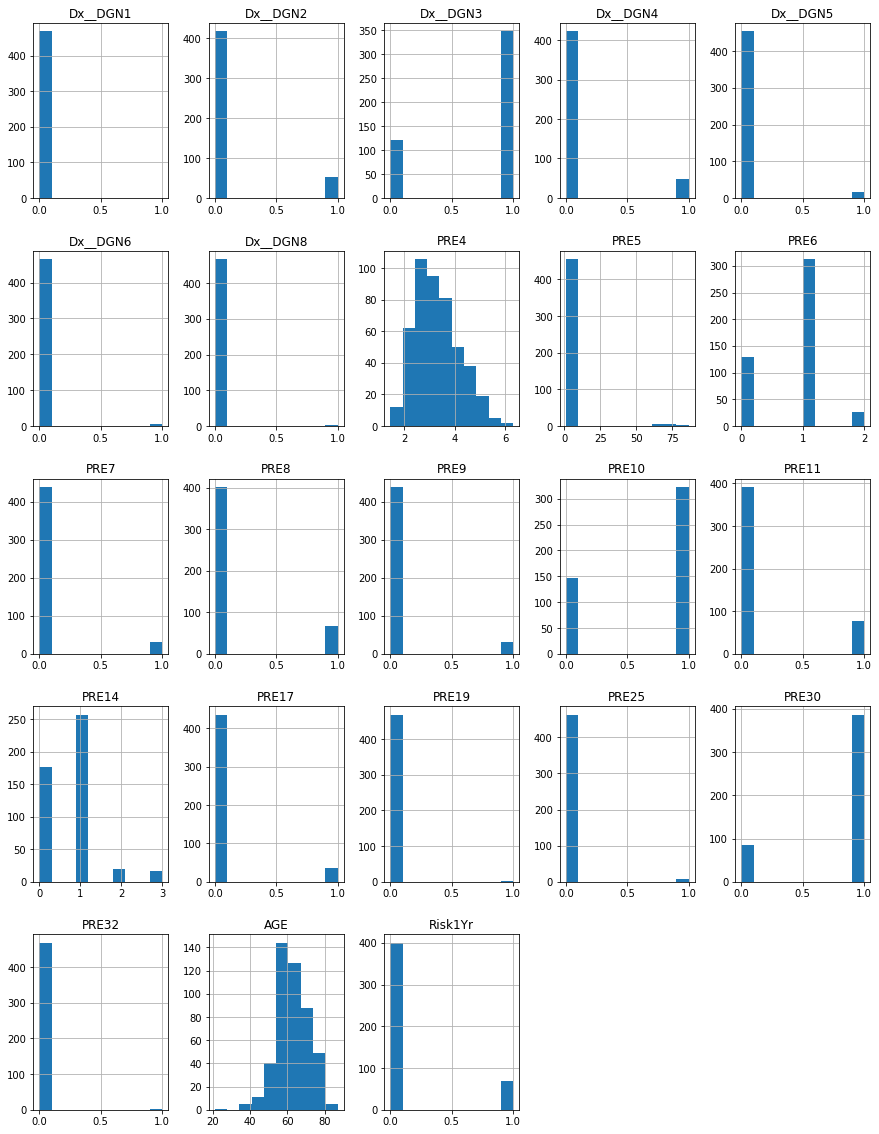

In [20]:
# Overview of distributions of all the variables

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

<AxesSubplot:>

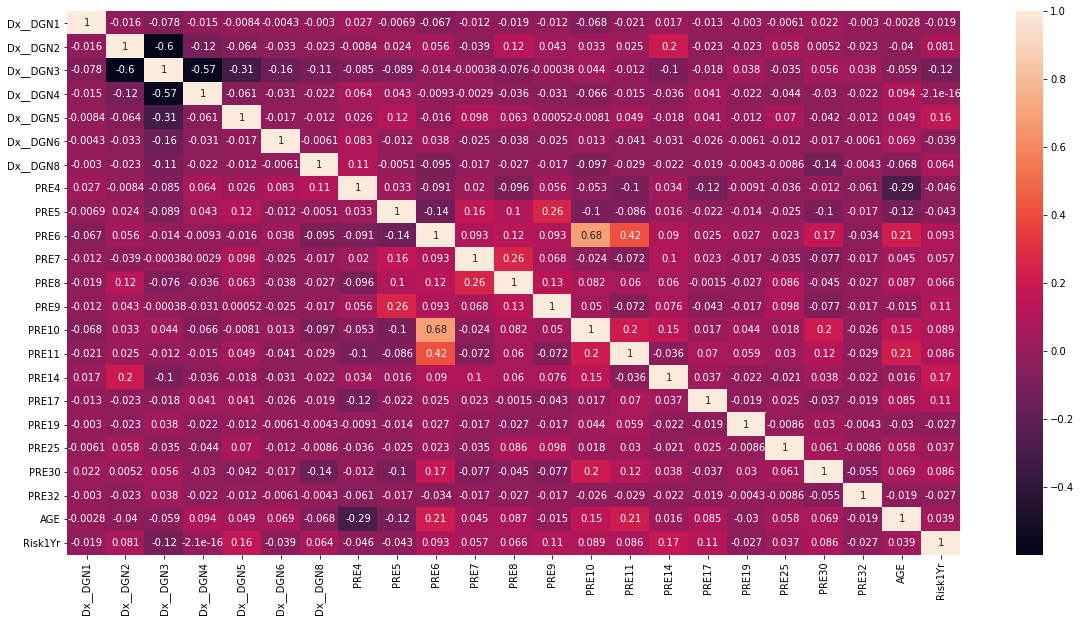

In [21]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 